In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout , MaxPooling2D , Conv2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import os
import cv2

In [ ]:
import os
import cv2
from google.colab import drive
import numpy as np

# ===================================================
#               1. MOUNT GOOGLE DRIVE
# ===================================================

print("--- Memulai Mount Google Drive ---")
try:
    # Perintah untuk melakukan mount Google Drive
    drive.mount('/content/drive')
    print("Mount berhasil: Drive terhubung di /content/drive.")
except Exception as e:
    print(f"Error saat mount Drive: {e}")
    # Hentikan eksekusi jika mount gagal
    exit()

# ===================================================
#               2. KONFIGURASI JALUR
# ===================================================

# Ganti dengan jalur folder UTAMA Anda di Drive
data_dir = '/content/drive/MyDrive/dataset buah'

# Periksa apakah folder utama ditemukan
if not os.path.exists(data_dir):
    print(f"\nERROR KRITIS: Direktori data utama tidak ditemukan di:\n{data_dir}")
    print("Pastikan nama folder 'dataset buah' dan jalurnya sudah benar.")
    exit()

# ===================================================
#               3. PEMUATAN DAN PRE-PEMROSESAN GAMBAR
# ===================================================

X_train = []
y_train = []
labels = [
    "apple fruit", "banana fruit", "cherry fruit", "chickoo fruit",
    "grapes fruit", "kiwi fruit", "mango fruit", "orange fruit",
    "strawberry fruit"
]
image_size = 224

print("\n--- Memulai Pemuatan Gambar dari Drive ---")

for label in labels:
    # Menggabungkan jalur utama (Drive) dengan nama kelas
    folderPath = os.path.join(data_dir, label)

    if not os.path.exists(folderPath):
        print(f"Hata : Folder kelas {folderPath} (Drive) bulunamadi. Melewati.")
        continue # Lewati ke label berikutnya jika folder tidak ada

    for path in os.listdir(folderPath):
        image_path = os.path.join(folderPath, path)

        # Hanya memproses jika itu adalah file
        if not os.path.isfile(image_path):
            continue

        try:
            # Membaca gambar menggunakan OpenCV
            image = cv2.imread(image_path)

            if image is None:
                print(f"Data : {image_path}.")
                continue

            # Resize gambar ke ukuran yang ditentukan
            image = cv2.resize(image, (image_size, image_size))

            # Normalisasi data (opsional, tapi sangat disarankan untuk DL)
            # image = image / 255.0 # Normalisasi ke 0.0 - 1.0 jika ingin langsung dinormalisasi di sini

            X_train.append(image)
            y_train.append(label)

        except Exception as e:
            print(f"Data saat memproses {image_path}: {e}")
            continue

# Mengubah list menjadi array NumPy (disarankan untuk pemrosesan DL)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)


print("\n--- Pemuatan Data Selesai ---")
print(f"Total gambar yang dimuat (X_train): {len(X_train_np)}")
print(f"Total label yang dimuat (y_train): {len(y_train_np)}")
if len(X_train_np) > 0:
    print(f"Bentuk (Shape) Array Gambar: {X_train_np.shape}")

--- Memulai Mount Google Drive ---
Mounted at /content/drive
Mount berhasil: Drive terhubung di /content/drive.

--- Memulai Pemuatan Gambar dari Drive ---

--- Pemuatan Data Selesai ---
Total gambar yang dimuat (X_train): 360
Total label yang dimuat (y_train): 360
Bentuk (Shape) Array Gambar: (360, 224, 224, 3)


In [ ]:
import os
import cv2
import numpy as np
# Asumsi: drive sudah dimount dan data_dir sudah didefinisikan

# -------------------------------------------------------------
# ASUMSI KONFIGURASI YANG SUDAH DILAKUKAN SEBELUMNYA:
# drive.mount('/content/drive')
# data_dir = '/content/drive/MyDrive/dataset buah'
# labels = ["apple fruit", "banana fruit", ..., "strawberry fruit"]
# image_size = 224
# -------------------------------------------------------------

# Ganti dengan jalur folder UTAMA Anda di Drive
data_dir = '/content/drive/MyDrive/dataset buah'

# Pastikan variabel dari langkah sebelumnya didefinisikan jika ini dijalankan terpisah
labels = ["apple fruit", "banana fruit", "cherry fruit", "chickoo fruit",
          "grapes fruit", "kiwi fruit", "mango fruit", "orange fruit",
          "strawberry fruit"]
image_size = 224

X_test = []
y_test = []

print("--- Memulai Pemuatan Data Testing dari Drive ---")

for label in labels:
    # GANTI: Menggunakan data_dir (Drive) sebagai direktori utama
    folderPath = os.path.join(data_dir, label)

    # Peringatan jika folder tidak ditemukan
    if not os.path.exists(folderPath):
        print(f"Folder kelas {folderPath} (Drive).")
        continue # Lewati ke label berikutnya

    for path in os.listdir(folderPath):
        image_path = os.path.join(folderPath, path)

        # Hanya memproses jika itu adalah file
        if not os.path.isfile(image_path):
            continue

        if not os.path.exists(image_path):
            print(f"Data : {image_path}.")
            continue

        try:
            image = cv2.imread(image_path)

            if image is None:
                print(f"Data : {image_path}.")
                continue

            # Resize gambar
            image = cv2.resize(image, (image_size, image_size))

            # Normalisasi data (jika dilakukan pada X_train, harus dilakukan juga pada X_test)
            # image = image / 255.0

            X_test.append(image)
            y_test.append(label)

        except Exception as e:
            print(f"Data saat memproses {image_path}: {e}")
            continue

# Mengubah list menjadi array NumPy
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

print("\n--- Pemuatan Data Testing Selesai ---")
print(f"Total gambar yang dimuat (X_test): {len(X_test_np)}")
print(f"Total label yang dimuat (y_test): {len(y_test_np)}")
if len(X_test_np) > 0:
    print(f"Bentuk (Shape) Array Gambar: {X_test_np.shape}")

--- Memulai Pemuatan Data Testing dari Drive ---

--- Pemuatan Data Testing Selesai ---
Total gambar yang dimuat (X_test): 360
Total label yang dimuat (y_test): 360
Bentuk (Shape) Array Gambar: (360, 224, 224, 3)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train , y_train = shuffle(X_train , y_train, random_state = 42)

In [ ]:
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(y_train)
y_test = lbl_encoder.transform(y_test)

In [ ]:
y_train = to_categorical(y_train , num_classes = 9)
y_test = to_categorical(y_test , num_classes = 9)

In [ ]:
datagen = ImageDataGenerator(
    validation_split = 0.2 ,
    horizontal_flip = True ,
    zoom_range = 90 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    rescale = 1.0 / 255.0
)

In [ ]:
print(f"X train : {X_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y train : {y_train.shape}")
print(f"y test : {y_test.shape}")

X train : (360, 224, 224, 3)
X test : (360, 224, 224, 3)
y train : (360, 9)
y test : (360, 9)


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16 , kernel_size = (3,3) , padding = "same" ,
                input_shape = (224,224,3) , activation = "relu" ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Flatten())
model.add(Dense(128 , activation = "relu"))
model.add(Dense(9 , activation = "softmax"))

learning_rate = 0.001
optimizer = Adam (learning_rate = learning_rate)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss" , patience = 5 , restore_best_weights = True)

In [ ]:
history = model.fit(X_train , y_train , verbose = 1 , epochs = 30 , batch_size = 32 ,
                   validation_data = (X_test, y_test) , callbacks = early_stopping)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.0974 - loss: 1894.3268 - val_accuracy: 0.1722 - val_loss: 87.7325
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2380 - loss: 183.6589 - val_accuracy: 0.1528 - val_loss: 4.2245
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2350 - loss: 8.3913 - val_accuracy: 0.2583 - val_loss: 1.9972
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3429 - loss: 2.4290 - val_accuracy: 0.2778 - val_loss: 1.9588
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5172 - loss: 1.5114 - val_accuracy: 0.4111 - val_loss: 1.8309
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6158 - loss: 1.2106 - val_accuracy: 0.5000 - val_loss: 1.6716
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6847 - loss: 1.0215 - val_accuracy: 0.6194 - val_loss: 1.4001
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7533 - loss: 0.7819 - val_accuracy: 0.7083 - val

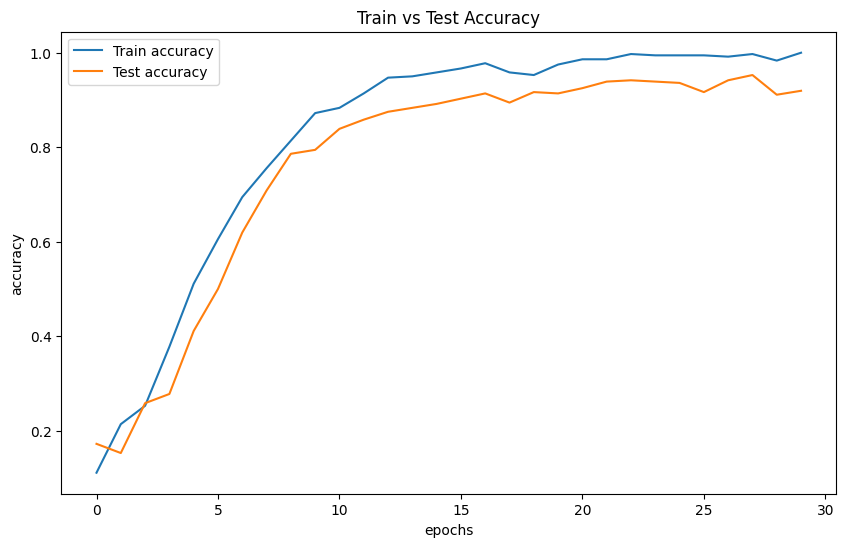

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(history.history["accuracy"] , label = "Train accuracy")
sns.lineplot(history.history["val_accuracy"] , label = "Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred , axis = 1)
y_test = np.argmax(y_test , axis = 1)
### target_names= list(labels.keys())

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step


In [ ]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       1.00      1.00      1.00        40
           2       1.00      0.95      0.98        42
           3       1.00      1.00      1.00        40
           4       0.93      1.00      0.96        37
           5       0.93      0.86      0.89        43
           6       0.97      0.97      0.97        40
           7       0.82      0.94      0.88        35
           8       0.95      1.00      0.97        38

    accuracy                           0.95       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.96      0.95      0.95       360



<Axes: >

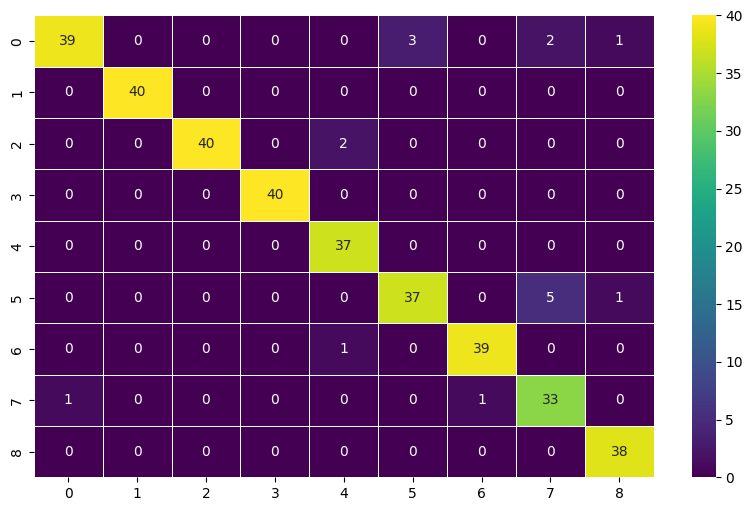

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_pred, y_test) , cmap = "viridis" , linewidths = 0.5 , annot = True , fmt = "d" )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,390,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,190,333 (141.87 MB)

 Trainable params: 12,396,777 (47.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,793,556 (94.58 MB)

In [ ]:
# Tentukan path penyimpanan di Google Drive
model_save_path = '/content/drive/MyDrive/fruit_classifier_model.h5'

# Simpan model
model.save(model_save_path)

print(f"Model berhasil disimpan di: {model_save_path}")

Model berhasil disimpan di: /content/drive/MyDrive/fruit_classifier_model.h5


Model berhasil dimuat kembali.

Melakukan Testing pada gambar: /content/drive/MyDrive/dataset buah/grapes fruit/Image_1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


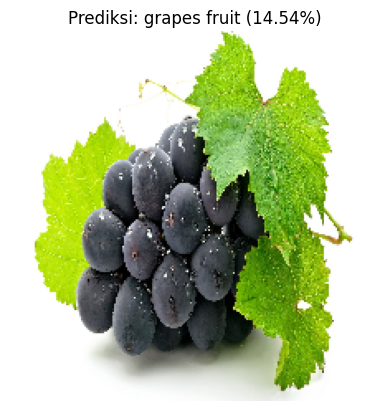


Hasil Klasifikasi: **grapes fruit** dengan Keyakinan: **14.54%**


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
# Pastikan Anda sudah menginstal tensorflow dan keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ===================================================
#               1. MOUNT GOOGLE DRIVE
# ===================================================
# try:
#     drive.mount('/content/drive')
# except:
#     print("Drive sudah dimount atau terjadi kesalahan saat mount.")

# ===================================================
#               2. DEFINISI VARIABEL KONSTAN
# ===================================================

# Path tempat Anda menyimpan model .h5
model_save_path = '/content/drive/MyDrive/fruit_classifier_model.h5'

# UKURAN GAMBAR HARUS 224, sesuai dengan yang digunakan pada pemuatan data sebelumnya
IMAGE_SIZE = 224

# Label kelas
class_labels = [
    "apple fruit", "banana fruit", "cherry fruit", "chickoo fruit",
    "grapes fruit", "kiwi fruit", "mango fruit", "orange fruit",
    "strawberry fruit"
]

# Jalur direktori utama dataset
data_dir = '/content/drive/MyDrive/dataset buah'

# ===================================================
#               3. MEMUAT MODEL
# ===================================================
try:
    loaded_model = load_model(model_save_path)
    print("Model berhasil dimuat kembali.")
except Exception as e:
    print(f"GAGAL memuat model dari {model_save_path}: {e}")
    print("Pastikan nama file dan jalurnya sudah benar dan Drive sudah terpasang.")
    exit()

# ===================================================
#               4. FUNGSI PREDIKSI
# ===================================================
def predict_new_image(img_path):
    """Memuat, memproses, dan memprediksi satu gambar."""
    # Muat gambar dan ubah ukuran
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))

    # Konversi ke array numpy dan normalisasi
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Tambahkan dimensi batch
    img_array /= 255.0 # Normalisasi ke 0.0 - 1.0

    # Lakukan prediksi
    predictions = loaded_model.predict(img_array)

    # Ambil indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions[0])

    # Ambil label dan probabilitas
    if predicted_class_index < len(class_labels):
        predicted_class_label = class_labels[predicted_class_index]
    else:
        predicted_class_label = f"Kelas tidak dikenal (Indeks {predicted_class_index})"

    confidence = predictions[0][predicted_class_index]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_class_label, confidence

# ===================================================
#               5. CONTOH TESTING
# ===================================================

test_image_path = os.path.join(data_dir, 'grapes fruit', 'Image_1.jpg')

if os.path.exists(test_image_path):
    print(f"\nMelakukan Testing pada gambar: {test_image_path}")
    if class_labels:
        label, confidence = predict_new_image(test_image_path)
        print(f"\nHasil Klasifikasi: **{label}** dengan Keyakinan: **{confidence*100:.2f}%**")
    else:
        print("\nGAGAL: Variabel 'class_labels' kosong.")
else:
    print(f"\nGAGAL: Path gambar untuk testing tidak valid. File tidak ditemukan di:\n{test_image_path}")